<a href="https://colab.research.google.com/github/nahuelalmeira/poblacionPenal/blob/master/DiploDatos_PoblacionPenitenciariaArgentina_VyA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos 2019 -  Población Penitenciaria en Argentina




> http://diplodatos.famaf.unc.edu.ar/poblacion-penitenciaria-en-argentina-2002-a-2017/




## Practico Análisis y Visualización de Datos

En este notebook se explicarán los métodos para la carga inicial de los datos que vamos a usar en el proyecto, se describirá la estructura general de los mismos, y veremos algunos métodos básicos de análisis.

Antes de comenzar a trabajar con CSVs, siempre es recomendable descargar el dataset en nuestra computadora y observarlo directamente con alguna herramienta de procesamiento de texto , para tener una visión rápida del tipo de datos con el cual trabajeremos, pero también para asegurarnos que estamos utilizando un archivo con el formato correcto.

In [1]:
### Aumentar el ancho del notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Inicialización y carga de datos

In [32]:
# Importamos las librerías necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 100)

#
sys.path.append('../config')
from mpl_settings_v3 import *

In [ ]:
## Cargamos el CSV en un dataframe. Si es posible, lo descargamos y 
## sino, lo leemos online

data_dir = '../datasets'
data_file = os.path.join(data_dir, 'sneep_2017_diplodatos.zip')
url = 'https://github.com/camporeale/Datos/raw/master/sneep_2017_diplodatos.zip'

if not os.path.isfile(data_file):
    try:
        if not os.path.exists(data_dir):
            os.mkdir(data_dir)
        import wget
        wget.download(url, out=data_dir)
        data_raw = pd.read_csv(data_file, compression='zip', index_col=0)
    except:
        print('No se pudo descargar dataset. Leyendo online')
        data_raw = pd.read_csv(url,compression='zip',index_col=0)
else:
    data_raw = pd.read_csv(data_file, compression='zip', index_col=0)

In [ ]:
## Seteamos semilla random para reproducibilidad
np.random.seed(0)

### Información disponible

#### Información general

- Año censo
- Tipo de servicio penitenciario
- Provincia
- Establecimiento

#### Información poblacional

- Género
- Nacionalidad
- Estado civil
- Mujeres viviendo con sus niños
- Último lugar de residencia
- Última provincia de residencia
- Nivel de instrucción
- Última situación laboral
- Capacitación laboral al ingresar

#### Información judicial

- Jurisdicción
- Situación legal
- Tipo de delito
- Reincidente
- Establecimiento de procedencia

#### Actividades y otras situaciones registradas dentro de la institución

- Recibió atención médica en el último año
- Recibió visitas en el último año
- Participa en programa laboral
- Horas de trabajo remunerado
- Participa en programa educativo
- Participa en actividades deportivas
- Calificación conducta
- Participó en alteración del orden en el último año
- Tipo de infracción disciplinaria
- Sanción aplicada
- Fue lesionado
- Tentativa de suicidio

#### Condenas y progresividad de la pena

- Condenado a prisión o reclusión perpetua
- Tuvo reducción de pena
- Duración de la condena
- Tuvo salidas transitorias
- Incorporado al régimen de semi libertad
- Participa en programas de pre-libertad
- Participa en programa de prisión discontinua
- Participa en programa de semi detención
- Tiene período de progresividad

### Análisis exploratorio

In [0]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data_raw.shape[0])
print("Cantidad de columnas: ", data_raw.shape[1])

Cantidad de registros:  85283
Cantidad de columnas:  50


In [0]:
# Listamos las columnas y sus tipos de datos
data_raw.dtypes

anio_censo                                              int64
provincia_descripcion                                  object
establecimiento_descripcion                            object
edad                                                  float64
genero_descripcion                                     object
nacionalidad_descripcion                               object
estado_civil_descripcion                               object
nivel_instruccion_descripcion                          object
ultima_situacion_laboral_descripcion                   object
capacitacion_laboral_al_ingresar_descripcion           object
ultimo_lugar_residencia_descripcion                    object
ultima_provincia_residencia_descripcion                object
jurisdiccion_descripcion                               object
situacion_legal_descripcion                            object
fecha_detencion                                        object
fecha_condenado                                        object
establec

In [0]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data_raw.sample(2).transpose()

,44841,43189
anio_censo,2017,2017
provincia_descripcion,Córdoba,Buenos Aires
establecimiento_descripcion,ESTABLECIMIENTO PENITENCIARIO Nº 5 (VILLA MARIA),SPF - COMPLEJO FED. DE JÓVENES ADULTOS - UR.1 ...
edad,32,19
genero_descripcion,Masculino,Masculino
nacionalidad_descripcion,Argentina,Argentina
estado_civil_descripcion,Soltero,Soltero
nivel_instruccion_descripcion,Terciario incompleto,Primario incompleto
ultima_situacion_laboral_descripcion,Trabajador de tiempo parcial,Desocupado
capacitacion_laboral_al_ingresar_descripcion,Tiene alguna profesión,No tiene ni oficio ni profesión


In [18]:
# Distribución por genero
data_raw["genero_descripcion"].value_counts()

Masculino     81553
Femenino       3602
Transexual      128
Name: genero_descripcion, dtype: int64

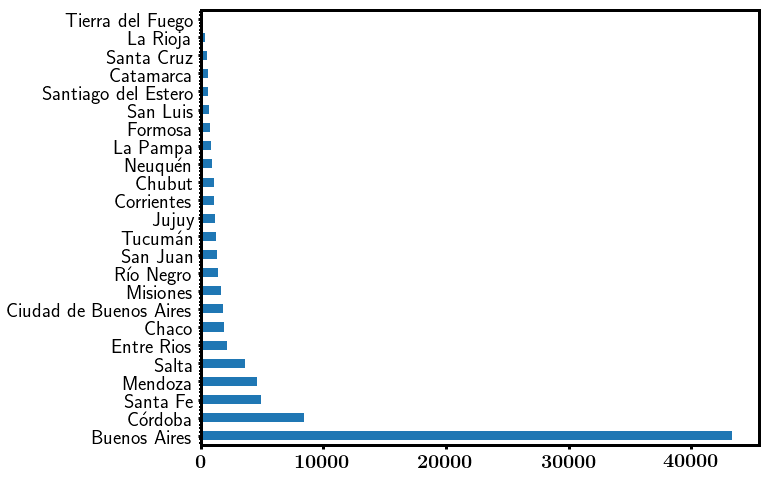

In [37]:
# Internos por provincia
plt.figure(figsize=(10, 8))
ax = plt.gca()
data_raw["provincia_descripcion"].value_counts().plot(kind='barh', ax=ax, fontsize=20)
plt.show()

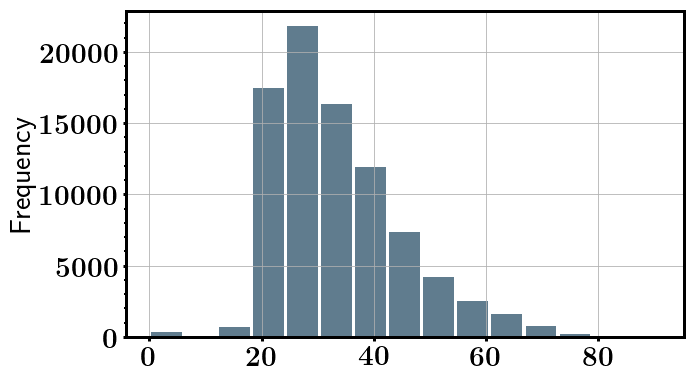

In [38]:
# Histograma por edades
data_raw["edad"].plot.hist(grid=True, bins=15, rwidth=0.9,color='#607c8e')

### Análisis del Grupo

En esta sección el grupo de trabajo deberá realizar el siguiente análisis:



*   Análisis estadístico de variables


> Seleccionar un conjunto de al menos 4 variables que resulten de interés para el grupo y:
1.   Usar distintos tipos de gráficos para describir sus distribuciones
2.   Analizar Outliers
3.   Calcular estadísticos clásicos (media, mediana, moda, desviación estandar)



*   Evolución de variables en el tiempo. Seleccionar 2 variables y graficar como fueron cambiando desde 2002 a 2017.  Para ello se tiene que utilizar el siguiente conjunto de datos:

https://github.com/camporeale/Datos/raw/master/sneep_2002_2017_diplodatos.zip




*   Analisis de probabilidades condicionales. Tomar al menos dos pares de variables y realizar un análisis del tipo:



> ¿Cual es la probabilidad de que el interno haya sido lesionado en el último año dado que está en una  prisión en Buenos Aires? ¿Y en Córdoba? 

> ¿Cual es la probabilidad de que se le otorguen salidas provisorias dado que esté casado/a? ¿Y siendo soltero?



Los siguientes recursos pueden usarse como ejemplos de distintos tipos de análisis:

*   http://www.saij.gob.ar/estadisticas-ejecucion-de-la-pena
*   http://www.jus.gob.ar/media/1126013/Una_Gestion_Penitenciaria_Integral_SNEEP.pdf




## Análisis estadístico de variables

### Edad

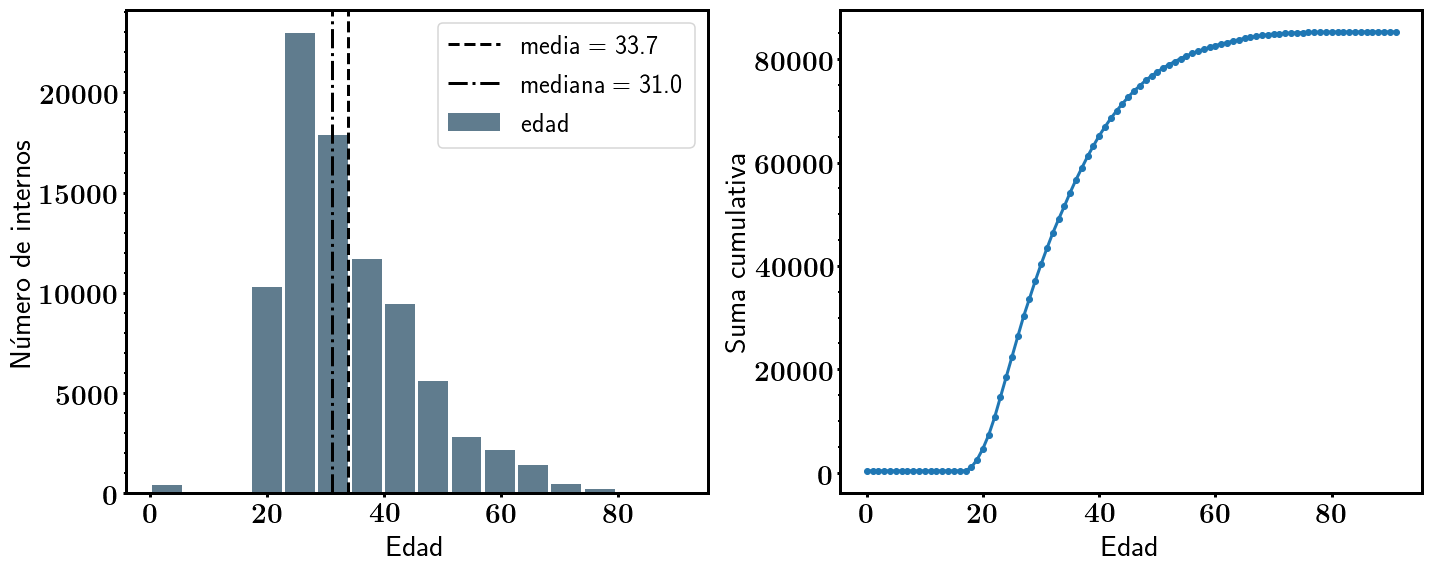

In [130]:
def get_cdf(data):
    cdf = []
    rango = range(min(data), max(data)+1)
    for e in rango:
        cdf.append((data<=e).sum())
    #cdf = np.array(cdf) / len(edades)    
    cdf = np.array(cdf)
    return rango, cdf

edades = data_raw['edad'].sort_values().dropna().astype('int').values

# Histograma por edades
fig, axes = plt.subplots(figsize=(20, 8), ncols=2)
ax = axes[0]
data_raw["edad"].plot.hist(bins=16, rwidth=0.9,color='#607c8e', ax=ax)
ax.set_ylabel('Número de internos')
ax.set_xlabel('Edad')
media = np.mean(edades)
mediana = np.median(edades)
ax.axvline(media, linestyle='--', color='k', label='media = {:.1f}'.format(media))
ax.axvline(mediana, linestyle='-.', color='k', label=r'mediana = {:.1f}'.format(mediana))
ax.legend(loc='best')
ax = axes[1]
rango_edad, cdf = get_cdf(edades)
plt.plot(rango_edad, cdf, '-o')
ax.set_xlabel('Edad')
ax.set_ylabel('Suma cumulativa')

plt.tight_layout()
plt.show()

Observamos que existen registros de edades correspondientes a menores de edad. Veamos qué edad tienen

In [88]:
from collections import Counter
Counter(edades[edades<18])

Counter({0: 369, 16: 8, 17: 11})

La mayoría de los registros presentan edad igual a 0. Esto podría tratarse de niños nacidos dentro de algún establecimiento penitenciario